## Data Understanding

In [ ]:
import zipfile
import os
with zipfile.ZipFile('/content/66e31d6ee96cd_student_resource_3.zip', 'r') as zip_ref:
  zip_ref.extractall()
os.remove('/content/66e31d6ee96cd_student_resource_3.zip')

In [ ]:
import pandas as pd
df = pd.read_csv('/content/student_resource 3/dataset/train.csv')
df.head()

,image_link,group_id,entity_name,entity_value
0,https://m.media-amazon.com/images/I/61I9XdN6OF...,748919,item_weight,500.0 gram
1,https://m.media-amazon.com/images/I/71gSRbyXmo...,916768,item_volume,1.0 cup
2,https://m.media-amazon.com/images/I/61BZ4zrjZX...,459516,item_weight,0.709 gram
3,https://m.media-amazon.com/images/I/612mrlqiI4...,459516,item_weight,0.709 gram
4,https://m.media-amazon.com/images/I/617Tl40LOX...,731432,item_weight,1400 milligram


In [ ]:
len(df)

263859

In [ ]:
import matplotlib.pyplot as plt
import requests
import cv2
from PIL import Image
from io import BytesIO
import numpy as np

In [ ]:
print(len(set(df.iloc[:, 1])))
print(len(set(df.iloc[:, 2])))

750
8


In [ ]:
print(np.unique(df.iloc[:, 2]))

['depth' 'height' 'item_volume' 'item_weight'
 'maximum_weight_recommendation' 'voltage' 'wattage' 'width']


In [ ]:
df['group_id'].value_counts()[:5]

,count
group_id,
459516,9458
752266,9063
281678,6137
308856,5437
731432,4741


## Data Visualization

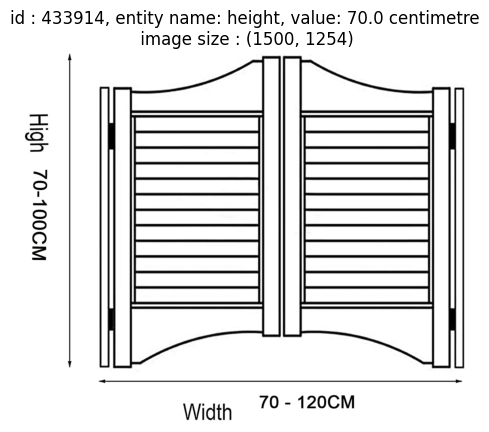

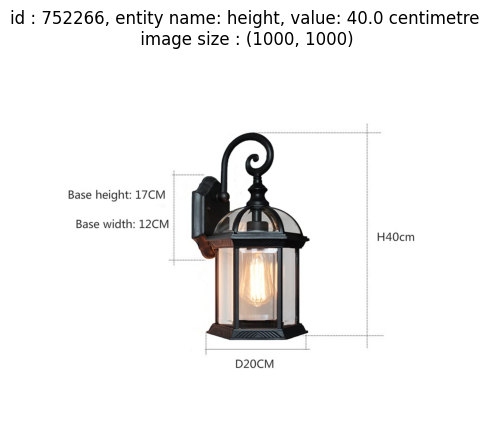

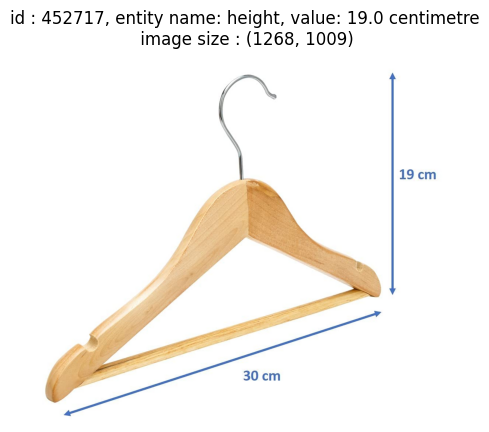

In [ ]:
sample_df = df[df['entity_name'] == 'height'].sample(3)
def print_3_samples(sample_df):
  sample_df = sample_df[:3]
  for i in range(len(sample_df)):
    path = sample_df.iloc[i, 0]
    group_id = sample_df.iloc[i, 1]
    entity_name = sample_df.iloc[i, 2]
    entity_value = sample_df.iloc[i, 3]

    response = requests.get(path)
    if(response.status_code == 200):
      image = Image.open(BytesIO(response.content))
      plt.imshow(image)
      plt.axis('off')
      plt.title(f'id : {group_id}, entity name: {entity_name}, value: {entity_value}\n image size : {image.size}')
      plt.show()
print_3_samples(sample_df)

In [ ]:
df2 = pd.read_csv('/content/student_resource 3/dataset/test.csv')
df2.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth


In [ ]:
print(len(set(df2['group_id'])))

print(len(set(df2['entity_name'])))
print(np.unique(df2['entity_name']))

924
8
['depth' 'height' 'item_volume' 'item_weight'
 'maximum_weight_recommendation' 'voltage' 'wattage' 'width']


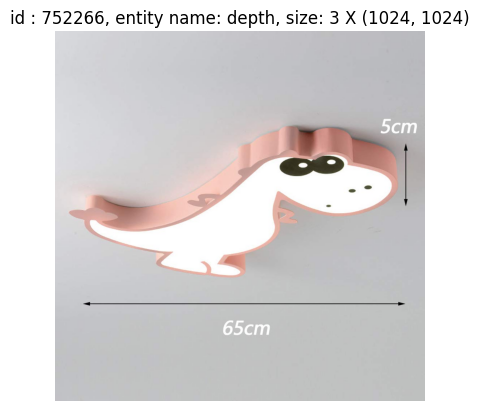

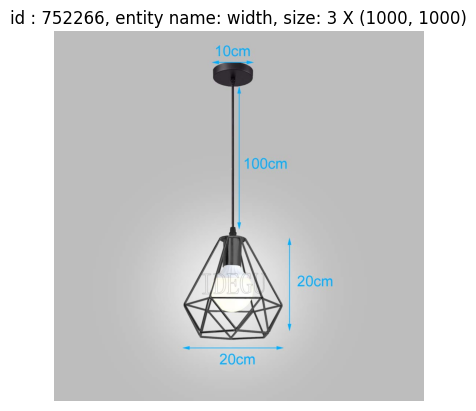

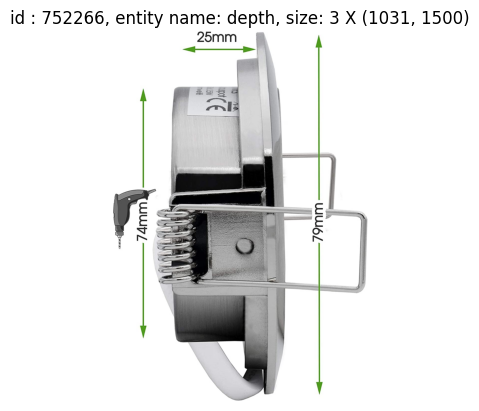

In [ ]:
sample_df = df2[df2['group_id'] == 752266].sample(3)

for i in range(len(sample_df)):
  path = sample_df.iloc[i, 1]
  group_id = sample_df.iloc[i, 2]
  entity_name = sample_df.iloc[i, 3]
  # entity_value = sample_df.iloc[i, 3]

  response = requests.get(path)
  if(response.status_code == 200):
    image = Image.open(BytesIO(response.content))
    plt.imshow(image)
    plt.axis('off')
    plt.title(f'id : {group_id}, entity name: {entity_name}, size: 3 X {image.size}')
    plt.show()

In [ ]:
len(df2)

131187

In [ ]:
print((df.iloc[0, :])['group_id'])

748919


In [ ]:
df['entity_name'].value_counts()

,count
entity_name,
item_weight,102786
depth,45127
width,44183
height,43597
voltage,9466
wattage,7755
item_volume,7682
maximum_weight_recommendation,3263


In [ ]:
df_weight = df[df['entity_name'] == 'weight']
df_depth = df[df['entity_name'] == 'depth']
df_height = df[df['entity_name'] == 'height']
df_voltage = df[df['entity_name'] == 'voltage']
df_wattage = df[df['entity_name'] == 'wattage']
df_volume = df[df['entity_name'] == 'item_volume']
df_mwr = df[df['entity_name'] == 'maximum_weight_recommendation']
df_width = df[df['entity_name'] == 'width']


In [ ]:
(df['group_id'].value_counts())[:5]

,count
group_id,
459516,9458
752266,9063
281678,6137
308856,5437
731432,4741


In [ ]:
df2['group_id'].value_counts()

,count
group_id,
752266,3099
478357,2513
810266,2067
483370,2058
866516,1814
...,...
609802,1
728858,1
884378,1


In [ ]:
sorted_train_groups = (list(sorted(np.unique(df['group_id']))))
sorted_test_groups = (list(sorted(np.unique(df2['group_id']))))
print(sorted_train_groups)
print(sorted_test_groups)

[101697, 104874, 106003, 107694, 107915, 108478, 110833, 111572, 113134, 115666, 116155, 119607, 120219, 120488, 120569, 123238, 124643, 125037, 126471, 127145, 127207, 129446, 130202, 130591, 131797, 132401, 139652, 140266, 141308, 142748, 144184, 145452, 145486, 146860, 148807, 149159, 149708, 150264, 150535, 150913, 152057, 152339, 153801, 154981, 156746, 156839, 161371, 164209, 166383, 169111, 171418, 171493, 172842, 173193, 174276, 175315, 178031, 178778, 178958, 179080, 180410, 180726, 181357, 182355, 183388, 184557, 185935, 186035, 187993, 191752, 192007, 192132, 192462, 192915, 200507, 202651, 204245, 205842, 208023, 209695, 210293, 211187, 211213, 214328, 217230, 219148, 219199, 219260, 220662, 221399, 225091, 225251, 226428, 226504, 231838, 234571, 235313, 235693, 237000, 238051, 238409, 241608, 241895, 241959, 242256, 243137, 244283, 245652, 245959, 249345, 249638, 251430, 252585, 252782, 254046, 254449, 254590, 254962, 258617, 258684, 261553, 261683, 263982, 267182, 267482,

54


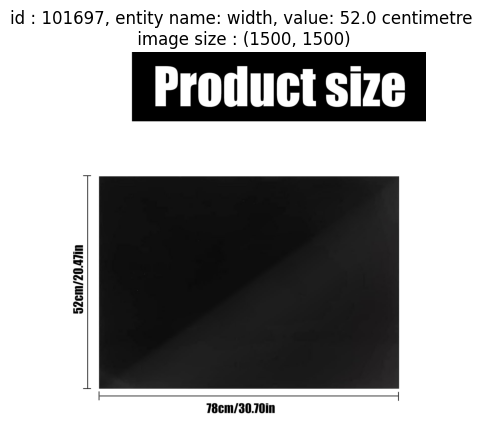

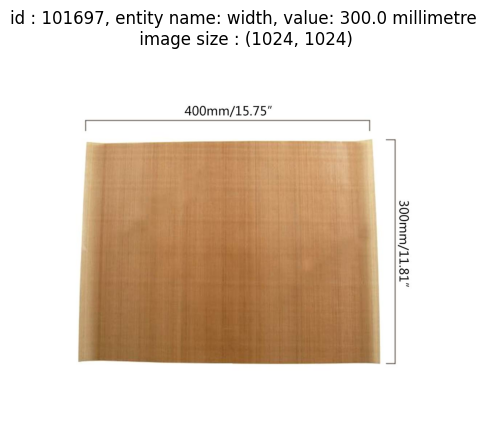

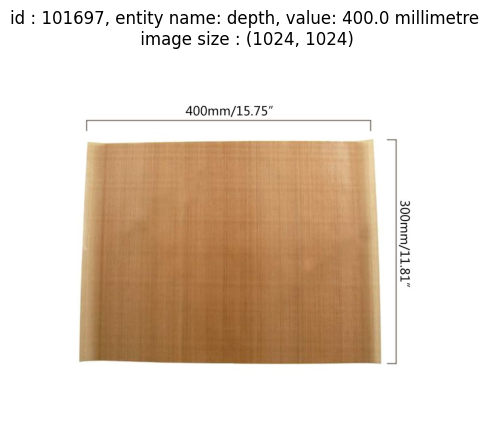

https://m.media-amazon.com/images/I/51nT9T5CTaL.jpg


In [ ]:
df_some = df[df['group_id'] == 101697]
print(len(df_some))
df_some = df_some[:3]
print_3_samples(df_some)
print(list(df_some['image_link'])[0])

In [ ]:
common = []
not_common = []
for i in sorted_train_groups:
  if(i in sorted_test_groups):
    common.append(i)
  else:
    not_common.append(i)
print(common)
print(not_common)

[104874, 106003, 107694, 107915, 110833, 111572, 113134, 115666, 116155, 119607, 120219, 120488, 120569, 124643, 125037, 126471, 127145, 127207, 129446, 130202, 130591, 131797, 132401, 140266, 141308, 142748, 145452, 145486, 146860, 148807, 149159, 149708, 150264, 150535, 150913, 152057, 152339, 154981, 156746, 156839, 161371, 164209, 166383, 169111, 171418, 172842, 173193, 174276, 175315, 178031, 178778, 178958, 179080, 180410, 180726, 181357, 183388, 184557, 185935, 186035, 187993, 192132, 192915, 200507, 202651, 204245, 205842, 208023, 209695, 210293, 211213, 217230, 219199, 219260, 220662, 221399, 225091, 225251, 226504, 231838, 234571, 235313, 235693, 237000, 238051, 238409, 241608, 241895, 241959, 242256, 243137, 244283, 245652, 245959, 249345, 249638, 252585, 252782, 254046, 254449, 254590, 254962, 258617, 261553, 261683, 263982, 267182, 267482, 268003, 271537, 272691, 273748, 275506, 276221, 276611, 276688, 276700, 277073, 277199, 277856, 278696, 278850, 279199, 279307, 281210,

In [ ]:
print(len(common), len(not_common))

638 112


In [ ]:
df[df['group_id'] == 459516]['entity_name'].value_counts()

,count
entity_name,
item_weight,7276
item_volume,2182


In [ ]:
print(len(df_height))
len(df2[df2['entity_name'] == 'height'])

43597


32282

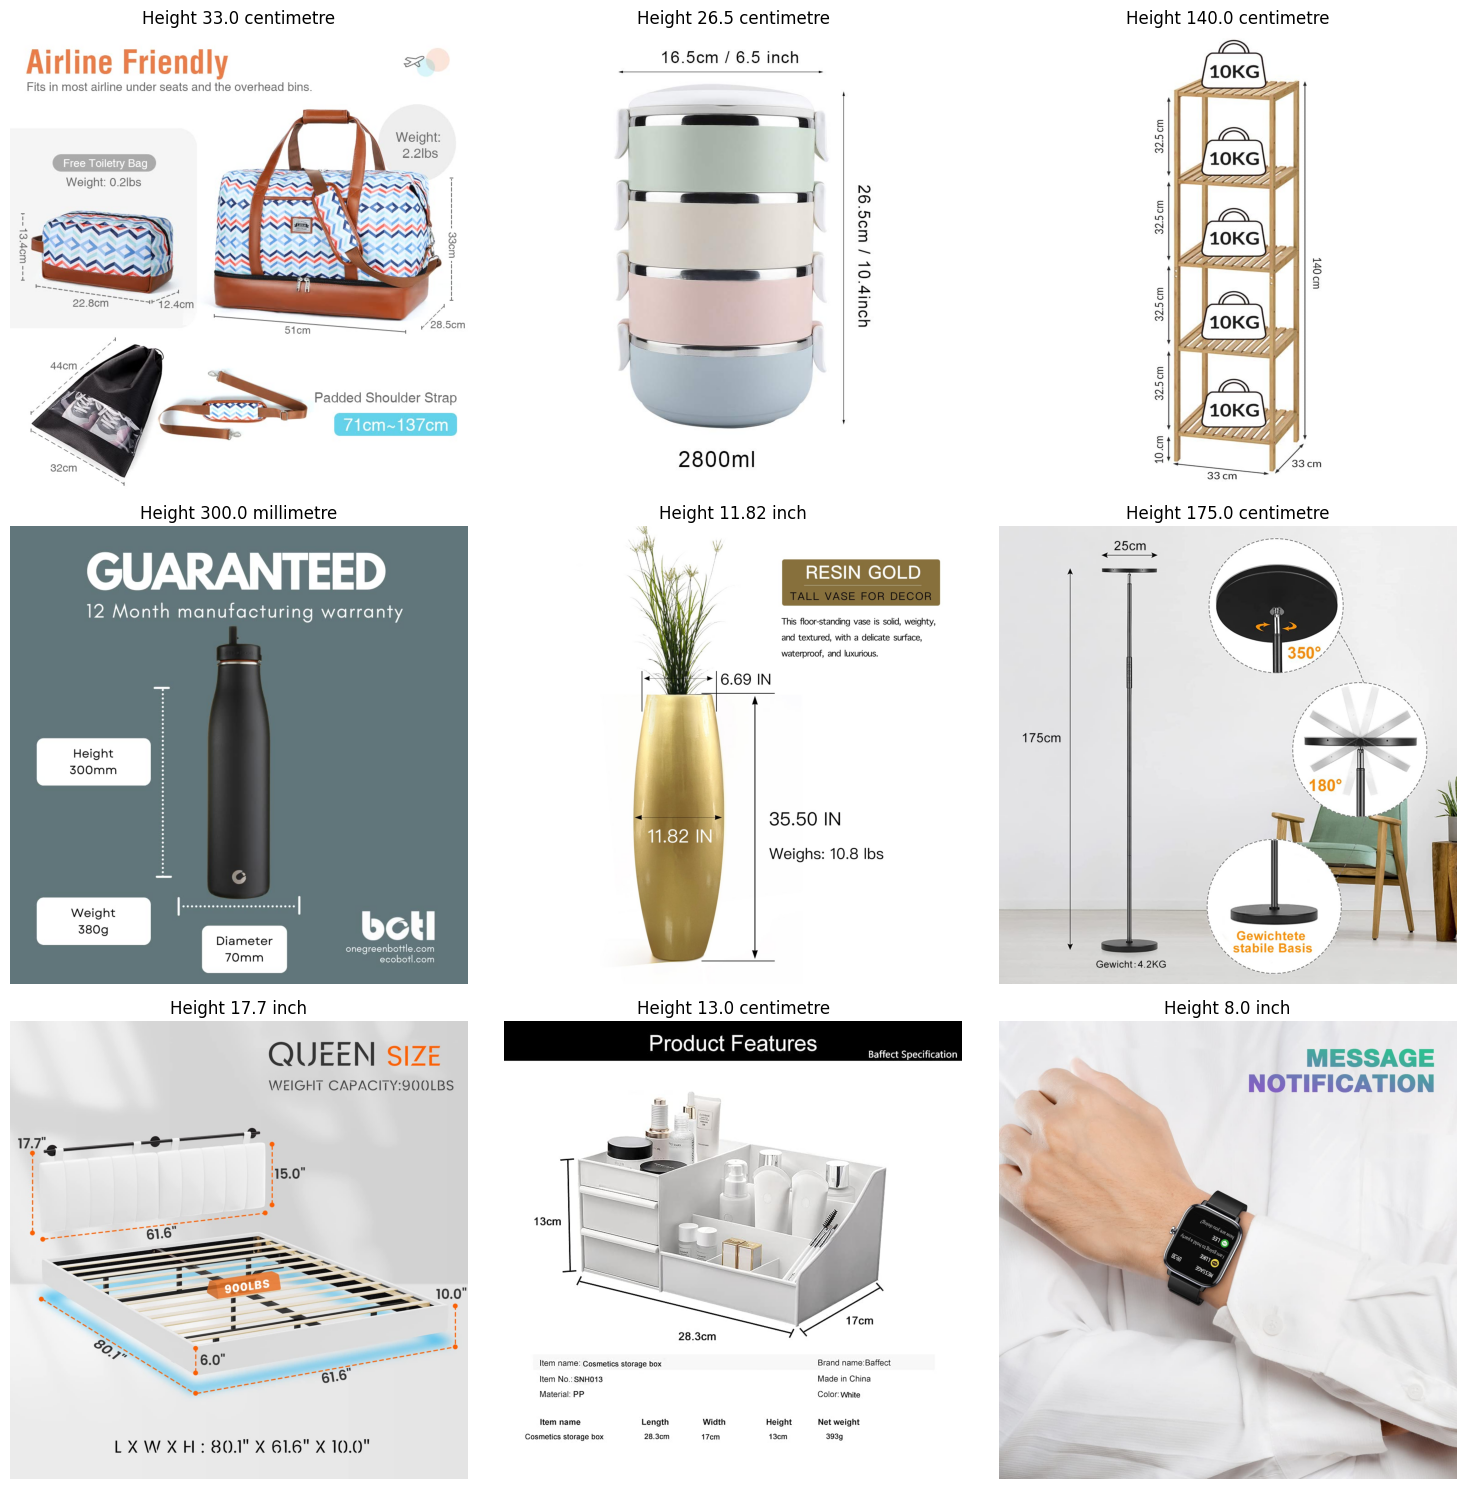

In [ ]:

some_df = df_height[20:]

def plot_images_from_urls(df, num_rows, num_cols):
    fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 15))
    axes = axes.flatten()

    for i, ax in enumerate(axes):
        if i < len(df):
            image_url = df['image_link'].iloc[i]
            entity_value = df['entity_value'].iloc[i]

            response = requests.get(image_url)
            if response.status_code == 200:

                img = Image.open(BytesIO(response.content))
                ax.imshow(img)
                ax.axis('off')
                ax.set_title(f"Height {entity_value}")
            else:
                ax.set_title(f"Error {i+1}")
                ax.axis('off')
        else:
            ax.axis('off')

    plt.tight_layout()
    plt.show()


plot_images_from_urls(some_df, num_rows=3, num_cols=3)


In [ ]:
df3 = pd.read_csv('/content/height.csv')
print(len(df3))
df3.head(2)

87


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/517HQ-oKp4...,758128,height,10.0 foot,C:/Users/mukun/Documents/ml/projects/amazon/da...,7/8/10 Feet (W) 4 Feet All sizes of tarpaulin ...
1,https://m.media-amazon.com/images/I/51v37lMqmi...,752266,height,18.03 centimetre,C:/Users/mukun/Documents/ml/projects/amazon/da...,"3.94"" (10cm) 11.42"" (29cm) 7.1"" (18,03cm)"


13.78in/35cm SIGNATURE


Text(0.5, 1.0, '35.0 centimetre')

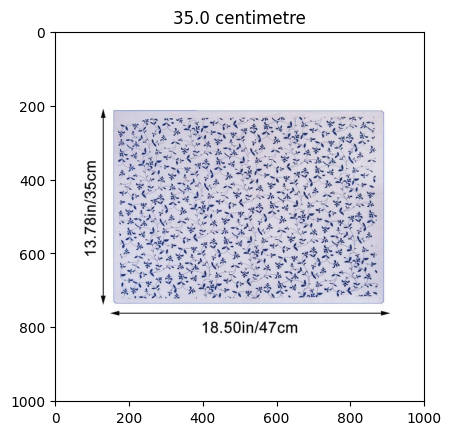

In [ ]:
# {'centimetre', 'foot', 'inch', 'metre', 'millimetre', 'yard'}

import re
def output(string):
  pass

print(df3['extracted_text'][10])
image = Image.open(BytesIO(requests.get(df3['image_link'][10]).content))
plt.imshow(image)
plt.title(df3['entity_value'][10])



## Text Extracting from Images

In [ ]:
import boto3

# Replace with your actual access key and secret key
access_key = 'your aws cloud user key"
secret_key = 'scret key for user
'
region = 'ap-south-1'  # Example: 'us-east-1'

# Create a boto3 client for a specific service (e.g., S3)
textract = boto3.client(
    'textract',
    aws_access_key_id=access_key,
    aws_secret_access_key=secret_key,
    region_name=region
)

In [ ]:
def extract_text_from_image(image_path, retries=4):
    """Extracts text from a single image using AWS Textract with retry logic."""
    try:
        with open(image_path, 'rb') as document:
            image_bytes = document.read()

        # Attempt to detect text from the image
        response = textract.detect_document_text(
            Document={'Bytes': image_bytes}
        )

        # Collect detected text
        detected_text = []
        for block in response.get('Blocks', []):
            if block['BlockType'] == 'LINE':
                detected_text.append(block.get('Text', ''))

        text = "\n".join(detected_text)
        return text.replace('\n', ' ')

    except textract.exceptions.ProvisionedThroughputExceededException as e:
        if retries > 0:
            wait_time = random.uniform(1, 5) * (4 - retries)
            print(f"Rate limit exceeded. Retrying after {wait_time:.2f} seconds...")
            time.sleep(wait_time)  # Wait before retrying
            return extract_text_from_image(image_path, retries=retries - 1)
        else:
            print(f"Max retries reached for {image_path}. Skipping.")
            return ""

    except Exception as e:
        print(f"Error processing {image_path}: {e}")
        return ""

def process_images_multithread(image_paths, image_links, extracted_texts, start_idx=0, save_interval=100, max_workers=5, output_file="extracted_data.csv"):
    """
    Processes a list of image paths in parallel using multithreading, returns results with index.
    Saves the progress intermittently to avoid data loss.
    """
    results = extracted_texts.copy()  # Copy previously extracted data

    with concurrent.futures.ThreadPoolExecutor(max_workers=max_workers) as executor:
        futures = {executor.submit(extract_text_from_image, image_path): idx for idx, image_path in enumerate(image_paths[start_idx:], start=start_idx)}

        # tqdm progress bar to track how many images are processed
        for future in tqdm(concurrent.futures.as_completed(futures), total=len(futures), desc="Processing Images"):
            idx = futures[future]  # Get the index associated with this future
            results[idx] = future.result()  # Store the result in the correct order based on index

            # Save the results intermittently
            if (idx + 1) % save_interval == 0:
                save_progress(image_paths, image_links, results, output_file)

    # Save final results
    save_progress(image_paths, image_links, results, output_file)
    return results

def save_progress(image_paths, image_links, extracted_texts, output_file):
    """Saves the extracted texts, image paths, and image links to a CSV file."""
    data = pd.DataFrame({
        'image_path': image_paths,
        'image_link': image_links,
        'extracted_text': extracted_texts
    })
    data.to_csv(output_file, index=False)
    print(f"Progress saved to {output_file}")

def load_progress(output_file):
    """Loads previously saved progress from a CSV file if available."""
    if os.path.exists(output_file):
        saved_data = pd.read_csv(output_file)
        print(f"Resuming from saved progress in {output_file}")
        return saved_data['image_path'].tolist(), saved_data['image_link'].tolist(), saved_data['extracted_text'].tolist()
    else:
        return [], [], []

In [ ]:
image_paths = rdf['image_path'].tolist()
image_links = rdf['image_link'].tolist()

# Check if there's any saved progress
saved_image_paths, saved_image_links, saved_extracted_texts = load_progress("extracted_data.csv")

# If no saved data exists, initialize with the full dataset
if not saved_image_paths:
    saved_image_paths = image_paths
    saved_image_links = image_links
    saved_extracted_texts = [None] * len(image_paths)

# Determine where to resume from
start_idx = len([text for text in saved_extracted_texts if text is not None])

# Apply tqdm to visualize the progress of processing images in parallel
tqdm.pandas(desc="Extracting Text")

# Process images in parallel using multithreading, resuming from the saved progress
df1['extracted_text'] = pd.Series(
    process_images_multithread(image_paths, image_links, saved_extracted_texts, start_idx=start_idx, max_workers=5)
)
df1.head()

## Retriving the entity with units

## Regular Expression For max

In [ ]:
import re

def extract_max_height(text):
    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)


    pattern = r'(\d+(?:\.\d+)?)\s*(foot|feet|ft|cm|centimetres?|inches|inch|in|"|metres?|mm|millimetres?|yard|yards?)'


    unit_conversion = {
        'foot': 'foot',
        'feet': 'foot',
        'ft': 'foot',
        'cm': 'centimetre',
        'centimetre': 'centimetre',
        'centimetres': 'centimetre',
        'inches': 'inch',
        'in': 'inch',
        '"': 'inch',
        'inch': 'inch',
        'metres': 'metre',
        'metre': 'metre',
        'mm': 'millimetre',
        'millimetres': 'millimetre',
        'yard': 'yard',
        'yards': 'yard',
    }


    matches = re.findall(pattern, text.lower())



    max_values = {
        'foot': None,
        'centimetre': None,
        'inch': None,
        'metre': None,
        'millimetre': None,
        'yard': None
    }


    for value, unit in matches:
        unit = unit_conversion[unit]
        value = float(value)


        if max_values[unit] is None or value > max_values[unit]:
            max_values[unit] = value


    for unit in ['foot', 'centimetre', 'inch', 'metre', 'millimetre', 'yard']:
        if max_values[unit] is not None:
            return f"{max_values[unit]} {unit}"


    return ""


df_some = pd.DataFrame()
df_some['Actual'] = df3['entity_value']
pred = []
for i in range(len(df3)):
  text = df3['extracted_text'][i]

  if(type(text) != str):
    text = ""

  pred.append(extract_max_height(text))
df_some['Predicted'] = pred
df_some

,Actual,Predicted
0,10.0 foot,10.0 foot
1,18.03 centimetre,29.0 centimetre
2,15.7 inch,80.0 centimetre
3,26.0 inch,31.5 inch
4,3.9 inch,12.0 centimetre
...,...,...
82,13.4 inch,2.6 inch
83,17.5 inch,30.0 inch
84,120.0 millimetre,320.0 millimetre
85,33.5 inch,33.5 inch


In [ ]:
print(sum(df_some['Actual'] == df_some['Predicted']))

24


In [ ]:
df4 = pd.read_csv('/content/wattage.csv')
print(len(df4))
df4.head(2)

16


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/51Na+Ym6mr...,179080,wattage,250.0 watt,C:/Users/mukun/Documents/ml/projects/amazon/da...,Ausdauernder Akku Bosch PowerPack 400 für 45 -...
1,https://m.media-amazon.com/images/I/712xVfULgz...,752266,wattage,100.0 watt,C:/Users/mukun/Documents/ml/projects/amazon/da...,- Elliott Erwitt/100+1 Elliott Erwitt/100+1 El...


R ORICO LEADING TECHNOLOGY UT /SPECIFICATIONS */Product Name USB-C240W 40Gbps Data Cable Model CC240-40-05/CC240-40-10 //Cable Material Aluminum Alloy+Woven Mesh *ang/Product Color /Black /Transmission Speed 40Gbps /Output Power 48V ==5A 240W(Max) / Output 8K@60Hz /Interface USB-C to C /Cable length 0.5m 1m PR Type (/90° *)(ORICO Technologies Co., Ltd.) 400-6696298 */Tel:86-755-25196059 www.orico.com.cn Website: www.orico.cc E-mail: supports@orico.com.cn Company Add: 1903-1904, 14A, Zhonghaixin Innovation Industrial Park, no.12, Gan Lee Sixth Road, Gankeng Community, Jihua Street, Shenzhen, China 11th Q/SZYC 010-2018 ECIREP Eventus Sistemi d.o.o. Ukmarjeva ulica 2, SI-1000 Ljubljana,Slovenia EUCustomersService@outlook.com UK|REP EVESION TRADING LIMITED Suite2a Blackthorn House, St Pauls Square, Birmingham, United Kingdom, B3 1RL UKCustomersService@outlook.com CEFC UK CA FR BOîTE EN PAPIER+SAC DE CPE+BLISTER /Made in China


Text(0.5, 1.0, '240.0 watt')

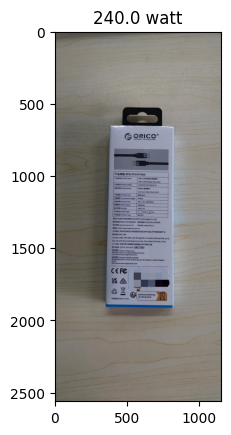

In [ ]:
print(df4['extracted_text'][6])
image = Image.open(BytesIO(requests.get(df4['image_link'][6]).content))
plt.imshow(image)
plt.title(df4['entity_value'][6])


In [ ]:
import re

def extract_max_wattage(text):

    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)


    pattern = r'(\d+(?:\.\d+)?)\s*(kw|kilowatt|w\b|watts?)'


    unit_conversion = {
        'kw': 'kilowatt',
        'kilowatt': 'kilowatt',
        'w': 'watt',
        'watt': 'watt',
        'watts': 'watt'
    }


    matches = re.findall(pattern, text.lower())


    max_values = {
        'kilowatt': None,
        'watt': None
    }


    for value, unit in matches:
      if unit:
          unit = unit_conversion[unit]
          value = float(value)


          if unit == 'kilowatt':
              value_in_watts = value * 1000
          else:
              value_in_watts = value


          if max_values[unit] is None or value_in_watts > max_values[unit]:
              max_values[unit] = value_in_watts


    if max_values['kilowatt'] is not None:
        return f"{max_values['kilowatt'] / 1000} kilowatt"
    elif max_values['watt'] is not None:
        return f"{max_values['watt']} watt"


    return ""


df_some = pd.DataFrame()
df_some['Actual'] = df4['entity_value']
pred = []
for i in range(len(df4)):
  text = df4['extracted_text'][i]

  if(type(text) != str):
    text = ""

  pred.append(extract_max_wattage(text))
df_some['Predicted'] = pred
df_some


,Actual,Predicted
0,250.0 watt,250.0 watt
1,100.0 watt,
2,9.0 watt,
3,250.0 watt,250.0 watt
4,324.0 watt,324.0 watt
5,65.0 watt,65.0 watt
6,240.0 watt,240.0 watt
7,8.0 watt,8.0 watt
8,10.0 watt,10.0 watt
9,20.0 watt,20.0 watt


In [ ]:

print(sum(df_some['Actual'] == df_some['Predicted']))
print(len(df_some))

12
16


In [ ]:
df5 = pd.read_csv('/content/item_weight.csv')
print(len(df5))
df5.head(2)

206


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/61-IzR6mhK...,489118,item_weight,400 gram,C:/Users/mukun/Documents/ml/projects/amazon/da...,""" 60% LESS OIL 5 : 15 USED THAN PM OTHER BRAND..."
1,https://m.media-amazon.com/images/I/61LLE5kWCJ...,630869,item_weight,20.0 gram,C:/Users/mukun/Documents/ml/projects/amazon/da...,Malachite Perimeter: 19.5 cm Name Nancie 8 mm ...


Y TED TR nutravita * NI 2000MG SEA KELP NATURAL SOURCE OF IODINE 8 No Synthetic Fillers or Binders MONTHS Vegan Friendly SUPPLY GMO Free Ingredients GMP 240 VEGAN TABLETS FOOD SUPPLEMENT 102g e


Text(0.5, 1.0, '102 gram')

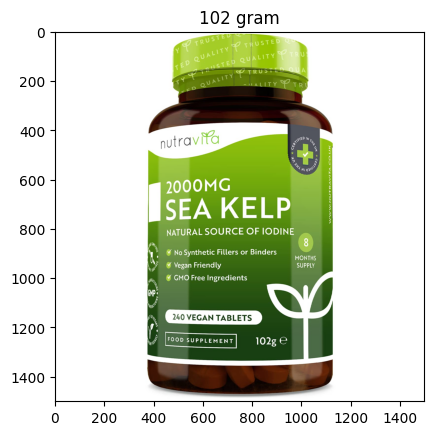

In [ ]:
print(df5['extracted_text'][15])
image = Image.open(BytesIO(requests.get(df5['image_link'][15]).content))
plt.imshow(image)
plt.title(df5['entity_value'][15])

In [ ]:
import re
import pandas as pd

def extract_max_weight(text):

    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)


    pattern = r'(\d+(?:\.\d+)?)\s*(gram|grams|g\b|gm|kilogram|kilograms|kg|kgs|milligram|mg|microgram|pound|pounds|lb|lbs|ounce|ounces|oz|0z|ton|tons)'


    unit_conversion = {
        'g': 'gram',
        'gram': 'gram',
        'grams': 'gram',
        'gm': 'gram',
        'kilogram': 'kilogram',
        'kilograms': 'kilogram',
        'kg': 'kilogram',
        'kgs' :'kilogram',
        'milligram': 'milligram',
        'mg': 'milligram',
        'microgram': 'microgram',
        'pound': 'pound',
        'pounds': 'pound',
        'lb': 'pound',
        'lbs': 'pound',
        'ounce': 'ounce',
        'ounces': 'ounce',
        'oz' : 'ounce',
        '0z' : 'ounce',
        'ton': 'ton',
        'tons': 'ton',
    }


    priority_order = ['gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'ton']


    matches = re.findall(pattern, text.lower())

    max_values = {unit: None for unit in priority_order}


    for value, unit in matches:
        unit = unit_conversion[unit]
        value = float(value)


        if max_values[unit] is None or value > max_values[unit]:
            max_values[unit] = value


    for unit in priority_order:
        if max_values[unit] is not None:
            return f"{max_values[unit]} {unit}"


    return ""


df_some = pd.DataFrame()
df_some['Actual'] = df5['entity_value']
pred = []

for i in range(len(df5)):
    text = df5['extracted_text'][i]

    if type(text) != str:
        text = ""

    pred.append(extract_max_weight(text))


df_some['Predicted'] = pred
df_some



,Actual,Predicted
0,400 gram,
1,20.0 gram,20.0 gram
2,200 gram,200.0 gram
3,1200.0 milligram,1200.0 milligram
4,9.0 ounce,9.0 ounce
...,...,...
201,250.0 gram,250.0 gram
202,23.8 gram,
203,125 gram,
204,25 gram,25.0 gram


In [ ]:
print(sum(df_some['Actual'] == df_some['Predicted']))
print(len(df5))

89
206


In [ ]:
df6 = pd.read_csv('/content/maximum_weight_recommendation.csv')
print(len(df6))
df6.head(2)

7


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/71anpO7gsw...,120219,maximum_weight_recommendation,4.0 pound,C:/Users/mukun/Documents/ml/projects/amazon/da...,EINFACH ZU INSTALLIEREN 1.Reinigen und trockne...
1,https://m.media-amazon.com/images/I/71J8+lHwFm...,611510,maximum_weight_recommendation,350 pound,C:/Users/mukun/Documents/ml/projects/amazon/da...,Heavy Duty Structure Sturdy and Durable Weight...


In [ ]:
df['entity_name'].value_counts()

,count
entity_name,
item_weight,102786
depth,45127
width,44183
height,43597
voltage,9466
wattage,7755
item_volume,7682
maximum_weight_recommendation,3263


In [ ]:
df2['entity_name'].value_counts()

,count
entity_name,
height,32282
depth,28146
width,26931
item_weight,22032
maximum_weight_recommendation,7028
voltage,5488
wattage,5447
item_volume,3833


Heavy Duty Structure Sturdy and Durable Weight capacity>350LBs SGS 8" Stroke (200MM) Initial Size:13.5" Extension Size:21.5" Office SGS test certification Explosion-proof ensure safety Convenient and practical foot ring Molded aluminum base Reinforced structure Quite:rolling smoothly Sturdy and durable Suitable:safe for all hard&soft floors


Text(0.5, 1.0, '350 pound')

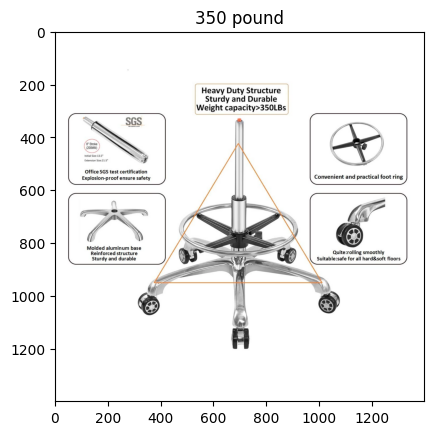

In [ ]:
print(df6['extracted_text'][1])
image = Image.open(BytesIO(requests.get(df6['image_link'][1]).content))
plt.imshow(image)
plt.title(df6['entity_value'][1])

In [ ]:
import re
import pandas as pd

def extract_max_weight_recommendation(text):

    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)


    pattern = r'(\d+(?:\.\d+)?)\s*(gram|grams|g\b|gm|kilogram|kilograms|kg|kgs|milligram|mg|microgram|pound|pounds|lb|lbs|ounce|ounces|oz|0z|ton|tons|person|persons)'


    unit_conversion = {
        'g': 'gram',
        'gram': 'gram',
        'grams': 'gram',
        'gm': 'gram',
        'kilogram': 'kilogram',
        'kilograms': 'kilogram',
        'kg': 'kilogram',
        'kgs' :'kilogram',
        'milligram': 'milligram',
        'mg': 'milligram',
        'microgram': 'microgram',
        'pound': 'pound',
        'pounds': 'pound',
        'lb': 'pound',
        'lbs': 'pound',
        'ounce': 'ounce',
        'ounces': 'ounce',
        'oz' : 'ounce',
        '0z' : 'ounce',
        'ton': 'ton',
        'tons': 'ton',
        'person': 'person',
        'persons' : 'person'
    }


    priority_order = ['gram', 'kilogram', 'microgram', 'milligram', 'ounce', 'pound', 'person', 'ton']


    matches = re.findall(pattern, text.lower())


    max_values = {unit: None for unit in priority_order}


    for value, unit in matches:
        if unit:
          unit = unit_conversion[unit]
          value = float(value)


          if max_values[unit] is None or value > max_values[unit]:
              max_values[unit] = value


    for unit in priority_order:
        if max_values[unit] is not None:
            return f"{max_values[unit]} {unit}"


    return ""


df_some = pd.DataFrame()
df_some['Actual'] = df6['entity_value']
pred = []

for i in range(len(df6)):
    text = df6['extracted_text'][i]

    if type(text) != str:
        text = ""

    pred.append(extract_max_weight(text))


df_some['Predicted'] = pred
df_some




,Actual,Predicted
0,4.0 pound,
1,350 pound,350.0 pound
2,35 pound,95.0 pound
3,100 kilogram,100.0 kilogram
4,250 kilogram,250.0 kilogram
5,2 person,
6,7.0 pound,7.0 pound


In [ ]:
df7 = pd.read_csv('/content/depth.csv')
df8 = pd.read_csv('/content/width.csv')
print(len(df7))
print(len(df8))
df8.head()


90
250


,Unnamed: 0,image_path,image_link,extracted_text,entity_value
0,0,C:/Users/mukun/Documents/ml/projects/amazon/da...,https://m.media-amazon.com/images/I/51GzV0nG31...,L:132mm Hole Distance: 64mm 12mm H: 16mm 58mm ...,22.0 millimetre
1,1,C:/Users/mukun/Documents/ml/projects/amazon/da...,https://m.media-amazon.com/images/I/61Drr5Mq3n...,20cm 10cm 42cm TYPE: BALANCE CAR SNOWBOARD MAT...,20.0 centimetre
2,2,C:/Users/mukun/Documents/ml/projects/amazon/da...,https://m.media-amazon.com/images/I/519c3S677D...,Max. 500g Min. 10g Volume 250ml 9cm/3.st 23cm/...,9.0 centimetre
3,3,C:/Users/mukun/Documents/ml/projects/amazon/da...,https://m.media-amazon.com/images/I/61Byi7hvtF...,Magnetic Resistance KEY FEATURES Stepless AND ...,510.0 millimetre
4,4,C:/Users/mukun/Documents/ml/projects/amazon/da...,https://m.media-amazon.com/images/I/61+ZITVTtD...,PRODUCT DIMENSIONS 36cm 75cm 30cm 15kg 32cm 32...,75.0 centimetre


MODEL: RUT4T12 11 30 IN " 2 INDIA. // OFFICIAL BASEBALL X LITESPEED PERFORMANCE


Text(0.5, 1.0, '30.0 inch')

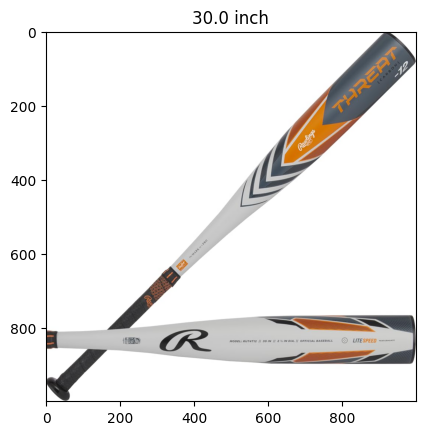

In [ ]:
print(df7['extracted_text'][1])
image = Image.open(BytesIO(requests.get(df7['image_link'][1]).content))
plt.imshow(image)
plt.title(df7['entity_value'][1])

In [ ]:
import re
import pandas as pd

def extract_min_width(text):

    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)


    pattern = r'(\d+(?:\.\d+)?)\s*(foot|feet|ft|cm|centimetres?|in|"?|inches?|metres?|mm|millimetres?|yards?)'


    unit_conversion = {
        'foot': 'foot',
        'feet': 'foot',
        'ft': 'foot',
        'cm': 'centimetre',
        'centimetre': 'centimetre',
        'centimeters': 'centimetre',
        'inches': 'inch',
        'in': 'inch',
        '"': 'inch',
        'inch': 'inch',
        'metres': 'metre',
        'metre': 'metre',
        'mm': 'millimetre',
        'millimetre': 'millimetre',
        'yard': 'yard',
        'yards': 'yard',
    }


    matches = re.findall(pattern, text.lower())


    min_values = {
        'foot': None,
        'centimetre': None,
        'inch': None,
        'metre': None,
        'millimetre': None,
        'yard': None
    }


    for value, unit in matches:
        if unit:
            unit = unit_conversion[unit]
            value = float(value)


            if min_values[unit] is None or value < min_values[unit]:
                min_values[unit] = value


    for unit in ['foot', 'centimetre', 'inch', 'metre', 'millimetre', 'yard']:
        if min_values[unit] is not None:
            return f"{min_values[unit]} {unit}"


    return ""


df_some = pd.DataFrame()
df_some['Actual'] = df3['entity_value']
pred = []

for i in range(len(df3)):
    text = df3['extracted_text'][i]

    if type(text) != str:
        text = ""

    pred.append(extract_max_height(text))

df_some['Predicted'] = pred
print(sum(df_some['Actual'] == df_some['Predicted']), len(df_some))
df_some.head()
# print(extract_min_depth(df7['extracted_text'][1]))


24 87


,Actual,Predicted
0,10.0 foot,10.0 foot
1,18.03 centimetre,29.0 centimetre
2,15.7 inch,80.0 centimetre
3,26.0 inch,31.5 inch
4,3.9 inch,12.0 centimetre


In [ ]:
df9 = pd.read_csv('/content/item_volume.csv')
print(len(df9))
df9.head()

15


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/81FkSx0prE...,916768,item_volume,25.0 pint,C:/Users/mukun/Documents/ml/projects/amazon/da...,HOT BARGAINS 25 Hot Bargains Ltd No.2 FOIL CON...
1,https://m.media-amazon.com/images/I/81gHUqN5PZ...,557758,item_volume,16.0 fluid ounce,C:/Users/mukun/Documents/ml/projects/amazon/da...,KEEP MUUVING FORWARD NUUN SPORT A HEALTHY SPOR...
2,https://m.media-amazon.com/images/I/71idPLeOqI...,459516,item_volume,"[8.0, 12.0] fluid ounce",C:/Users/mukun/Documents/ml/projects/amazon/da...,"SUGGESTED USE: As a dietary supplement, take 1..."
3,https://m.media-amazon.com/images/I/71DdnoHPb9...,459516,item_volume,2.0 millilitre,C:/Users/mukun/Documents/ml/projects/amazon/da...,CONTENUTI MEDI per dose massima per giornalier...
4,https://m.media-amazon.com/images/I/714Hq8eCbp...,254449,item_volume,2.0 fluid ounce,C:/Users/mukun/Documents/ml/projects/amazon/da...,NUTRA 000 CHAMPS NON GMO iodine potassium iodi...


SUGGESTED USE: As a dietary supplement, take 1 capsule daily with 8-12 OZ of water or as directed by your healthcare professional. THIRD PARTY TESTED GLUTEN-FREE WARNING: For healthy individuals 18 years and older. Not recommended for those on blood thinners or who have poor digestion. Consult a healthcare professional prior to use if you are pregnant or nursing, taking medication, or have a medical condition. Keep out of reach of children. Do not use if safety seal is broken or missing. NOTICE: Store in a cool, dry place. cure, MADE AND QUALITY TESTED IN THE USA WITH GLOBALLY SOURCED INGREDIENTS. Manufactured by: nutricostmfg: 351 E 1750 N Vineyard, UT 84059 (866) 438-3694 I support@nutricost.com nutricost.com 8 10014 67398 1


Text(0.5, 1.0, '[8.0, 12.0] fluid ounce')

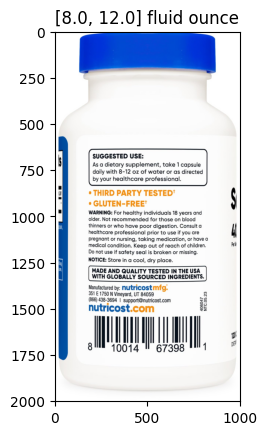

In [ ]:
# print(df9['extracted_text'][2])
# image = Image.open(BytesIO(requests.get(df9['image_link'][2]).content))
# plt.imshow(image)
# plt.title(df9['entity_value'][2])

In [ ]:
import re

def extract_max_volume(text):
    # Replace commas with dots for decimal numbers
    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)

    # Define a regular expression pattern to capture ranges, numbers, and volume-related units
    range_pattern = r'(\d+(?:\.\d+)?)\s*-\s*(\d+(?:\.\d+)?)\s*(centilitres?|cubic\s?feet?|cubic\s?inches?|cups?|decilitres?|fluid\s?ounces?|oz|fl oz|fl-oz|floz|gallons?|imperial\s?gallons?|litres?|liters?|microlitres?|ml|millilitres?|milliliters?|pints?|quarts?)'
    single_pattern = r'(\d+(?:\.\d+)?)\s*(centilitres?|cubic\s?feet?|cubic\s?inches?|cups?|decilitres?|fluid\s?ounces?|fl-oz|oz|fl oz|floz|gallons?|imperial\s?gallons?|litres?|liters?|microlitres?|ml|millilitres?|milliliters?|pints?|quarts?)'

    # Define the mapping for common volume units to their preferred form
    unit_conversion = {
        'centilitre': 'centilitre',
        'centilitres': 'centilitre',
        'cubic foot': 'cubic foot',
        'cubic feet': 'cubic foot',
        'cubic inch': 'cubic inch',
        'cubic inches': 'cubic inch',
        'cup': 'cup',
        'cups': 'cup',
        'decilitre': 'decilitre',
        'decilitres': 'decilitre',
        'fluid ounce': 'fluid ounce',
        'fluid ounces': 'fluid ounce',
        'floz': 'fluid ounce',
        'fl-oz': 'fluid ounce',
        'fl oz': 'fluid ounce',
        'oz' : 'fluid ounce',
        'gallon': 'gallon',
        'gallons': 'gallon',
        'imperial gallon': 'imperial gallon',
        'imperial gallons': 'imperial gallon',
        'litre': 'litre',
        'litres': 'litre',
        'liter': 'litre',
        'liters': 'litre',
        'microlitre': 'microlitre',
        'microlitres': 'microlitre',
        'millilitre': 'millilitre',
        'ml': 'millilitre',
        'millilitres': 'millilitre',
        'milliliter': 'millilitre',
        'milliliters': 'millilitre',
        'pint': 'pint',
        'pints': 'pint',
        'quart': 'quart',
        'quarts': 'quart'
    }


    range_matches = re.findall(range_pattern, text.lower())
    if range_matches:

        for low, high, unit in range_matches:
            unit = unit_conversion[unit]
            return f"[{float(low)}, {float(high)}] {unit}"


    single_matches = re.findall(single_pattern, text.lower())


    max_values = {
        'centilitre': None,
        'cubic foot': None,
        'cubic inch': None,
        'cup': None,
        'decilitre': None,
        'fluid ounce': None,
        'gallon': None,
        'imperial gallon': None,
        'litre': None,
        'microlitre': None,
        'millilitre': None,
        'pint': None,
        'quart': None
    }


    for value, unit in single_matches:
        unit = unit_conversion[unit]
        value = float(value)


        if max_values[unit] is None or value > max_values[unit]:
            max_values[unit] = value


    for unit in ['centilitre', 'cubic foot', 'cubic inch', 'cup', 'decilitre', 'fluid ounce',
                 'gallon', 'imperial gallon', 'litre', 'microlitre', 'millilitre', 'pint', 'quart']:
        if max_values[unit] is not None:
            return f"{max_values[unit]} {unit}"


    return ""

# Sample input text
# text = df9['extracted_text'][5]

# # Extract the maximum volume and print it
# print(extract_max_volume(text))

df_some = pd.DataFrame()
df_some['Actual'] = df9['entity_value']
pred = []
for i in range(len(df9)):
    text = df9['extracted_text'][i]
    if(type(text) != str):
        text = ""
    pred.append(extract_max_volume(text))
df_some['Predicted'] = pred
print(sum(df_some['Actual'] == df_some['Predicted']), len(df_some))
df_some



9 15


,Actual,Predicted
0,25.0 pint,
1,16.0 fluid ounce,16.0 fluid ounce
2,"[8.0, 12.0] fluid ounce","[8.0, 12.0] fluid ounce"
3,2.0 millilitre,100.0 millilitre
4,2.0 fluid ounce,60.0 millilitre
5,250.0 millilitre,250.0 millilitre
6,"[1.0, 1.6] millilitre","[1.0, 1.6] millilitre"
7,0.7 fluid ounce,
8,8.0 fluid ounce,8.0 fluid ounce
9,60.0 millilitre,60.0 millilitre


In [ ]:
# df8['image_link'][0]

In [ ]:
# en_vals = []
# for i in range(len(df8)):
#   en_vals.append(df_width[df_width['image_link'] == df8['image_link'][i]]['entity_value'].item())
# df8['entity_value'] = en_vals
# df8.head()

28 Layer Nanometer Coatings 0.15% Ultra-low Reflectivity , Anti-glaring K K&F CONCEPT ND1000(3.0) 100X100mm it


Text(0.5, 1.0, '100.0 millimetre')

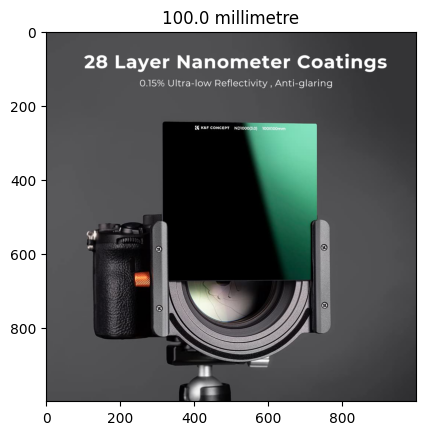

In [ ]:
print(df8['extracted_text'][245])
image = Image.open(BytesIO(requests.get(df8['image_link'][245]).content))
plt.imshow(image)
plt.title(df8['entity_value'][245])

In [ ]:
df_some = pd.DataFrame()
df_some['Actual'] = df8['entity_value']
pred = []
for i in range(len(df8)):
    text = df8['extracted_text'][i]
    if(type(text) != str):
        text = ""
    pred.append(extract_max_height(text))
df_some['Predicted'] = pred
print(sum(df_some['Actual'] == df_some['Predicted']), len(df_some))
df_some

86 250


,Actual,Predicted
0,22.0 millimetre,132.0 millimetre
1,20.0 centimetre,42.0 centimetre
2,9.0 centimetre,23.0 centimetre
3,510.0 millimetre,6.0 foot
4,75.0 centimetre,182.0 centimetre
...,...,...
245,100.0 millimetre,100.0 millimetre
246,5.11 inch,
247,70.0 centimetre,200.0 centimetre
248,11.0 centimetre,11.0 centimetre


In [ ]:
df10 = pd.read_csv('/content/voltage.csv')
print(len(df10))
df10.head()

19


,image_link,group_id,entity_name,entity_value,file_path,extracted_text
0,https://m.media-amazon.com/images/I/81M+LNYxNy...,271537,voltage,12.0 volt,C:/Users/mukun/Documents/ml/projects/amazon/da...,5.5 GPM WATER FLOW CORROSION SELF-PRIMING ADJU...
1,https://m.media-amazon.com/images/I/41qDdRo6EJ...,752266,voltage,"[220.0, 240.0] volt",C:/Users/mukun/Documents/ml/projects/amazon/da...,2.88in (7.5cm) 0.98in (2.5cm) 28.74in (73cm) P...
2,https://m.media-amazon.com/images/I/71PD2oyETu...,641642,voltage,31.0 volt,C:/Users/mukun/Documents/ml/projects/amazon/da...,* * CE 8 31V CONNECTABLE 8 HOOKS SAFE VOLTAGE ...
3,https://m.media-amazon.com/images/I/81P9nGvgcG...,306956,voltage,230.0 volt,C:/Users/mukun/Documents/ml/projects/amazon/da...,Beeketal Grillplatten verschiedene Größen und ...
4,https://m.media-amazon.com/images/I/81OuPv8f76...,271537,voltage,12.0 volt,C:/Users/mukun/Documents/ml/projects/amazon/da...,WHAT'S INSIDE THE BOX 1 X Drum Pump with Advan...


5.12in (13cm) E12 BASE Adjustment length RECOMMENDED BULBS 12.7in-78.7in (Bulbs not included) (50cm-200cm) Specifications Voltage 110 V-120V Wattage 60W MAX Bulb base E12 Material Metal Color Gold 15.56in (39.5cm)


Text(0.5, 1.0, '[110.0, 120.0] volt')

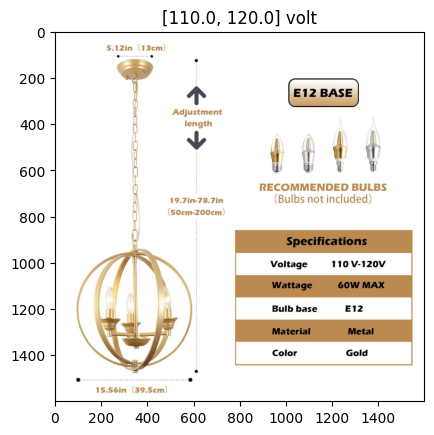

In [ ]:
print(df10['extracted_text'][17])
image = Image.open(BytesIO(requests.get(df10['image_link'][17]).content))
plt.imshow(image)
plt.title(df10['entity_value'][17])

In [ ]:
import re

def extract_max_voltage(text):


    text = re.sub(r'(\d+),(\d+)', r'\1.\2', text)

    range_pattern = r'(\d+(?:\.\d+)?)\s*(kv|kilovolts?|mv|millivolts?|v|volts?|voltage)?\s*-\s*(\d+(?:\.\d+)?)\s*(kv|kilovolts?|mv|millivolts?|v|volts?|voltage)'
    single_pattern = r'(\d+(?:\.\d+)?)\s*(kv|kilovolts?|mv|millivolts?|v|volts?|voltage)'


    unit_conversion = {
        'kv': 'kilovolt',
        'kilovolt': 'kilovolt',
        'kilovolts': 'kilovolt',
        'mv': 'millivolt',
        'millivolt': 'millivolt',
        'millivolts': 'millivolt',
        'v': 'volt',
        'volt': 'volt',
        'volts': 'volt',
        'voltage': 'volt',
    }


    range_matches = re.findall(range_pattern, text.lower())
    if range_matches:

        for low, unit1, high, unit2 in range_matches:

            if unit2:
                unit = unit_conversion[unit2]
            else:
                unit = unit_conversion[unit1] if unit1 else 'volt'

            return f"[{float(low)}, {float(high)}] {unit}"


    single_matches = re.findall(single_pattern, text.lower())


    max_values = {
        'kilovolt': None,
        'millivolt': None,
        'volt': None,
    }


    for value, unit in single_matches:
        unit = unit_conversion[unit]
        value = float(value)

        # Skip if "v" is found from a word, e.g., "victim"
        # if re.search(r'\b' + re.escape(value) + r'\s*v\b', text, re.IGNORECASE):
        #     continue


        if max_values[unit] is None or value > max_values[unit]:
            max_values[unit] = value


    for unit in ['kilovolt', 'millivolt', 'volt']:
        if max_values[unit] is not None:
            return f"{max_values[unit]} {unit}"

    return ""


text = 'Hello world(12V))'
print(extract_max_voltage(text))

12.0 volt


In [ ]:
df_final = pd.read_csv('/content/5000filled_final-origina.csv')
print(len(df_final))
df_final.tail()

131188


<ipython-input-64-c006c03f2d69>:1: DtypeWarning: Columns (0,2) have mixed types. Specify dtype option on import or set low_memory=False.
  df_final = pd.read_csv('/content/5000filled_final-origina.csv')


,index,image_link,group_id,entity_name,extracted_text
131183,131284,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,item_weight,BUILT-IN HANDLES COMES WITH DURABLE HANDLES FO...
131184,131285,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,maximum_weight_recommendation,BUILT-IN HANDLES COMES WITH DURABLE HANDLES FO...
131185,131286,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,item_weight,JOSSIE HUMAN NAME VICTOR PHONE NUMBER (955) 12...
131186,131287,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,maximum_weight_recommendation,JOSSIE HUMAN NAME VICTOR PHONE NUMBER (955) 12...
131187,index,image_link,group_id,entity_name,extracted_text


In [ ]:
df_final = df_final.iloc[:131187, :5]
df_final.tail(10).head(5)

,index,image_link,group_id,entity_name,extracted_text
131177,131278,https://m.media-amazon.com/images/I/A1hB6lQgjt...,748919,item_weight,KEEP FROZEN UNTIL READY TO USE. Crushed GARLIC...
131178,131279,https://m.media-amazon.com/images/I/A1kL4i+kcf...,257505,item_volume,WILDLIFE RESEARCH CENTER® SCENT KILLER GOL D U...
131179,131280,https://m.media-amazon.com/images/I/A1o50LMalI...,695048,item_weight,GREAT FOR ENTERTAINING PLANTERS Mixed Nuts MAD...
131180,131281,https://m.media-amazon.com/images/I/A1q3da5vzb...,724618,item_weight,AVAILABLE IN MULTIPLE SIZES STYLES Aci CREATE ...
131181,131282,https://m.media-amazon.com/images/I/A1q8C45g+0...,926285,item_weight,ADULT Ages 15+ LEFT


In [ ]:
df_final['extracted_text'].isnull().sum()

4159

In [ ]:
df_final.iloc[131177, 4]

'KEEP FROZEN UNTIL READY TO USE. Crushed GARLIC 16 cubes I 1 cube = 1 tsp. FARM FRESH GLUTEN FREE RAW VEGAN Dorot HALAL R PARVE Gardens O NETWT2.8OZ(80g)'

In [ ]:
list(df_final.tail(10).head(5)['image_link'])

['https://m.media-amazon.com/images/I/A1hB6lQgjtL.jpg',
 'https://m.media-amazon.com/images/I/A1kL4i+kcfL.jpg',
 'https://m.media-amazon.com/images/I/A1o50LMalIL.jpg',
 'https://m.media-amazon.com/images/I/A1q3da5vzbL.jpg',
 'https://m.media-amazon.com/images/I/A1q8C45g+0L.jpg']

In [ ]:
def map_func(row):

    text = row['extracted_text']
    entity_name = row['entity_name']

    if not text or not isinstance(text, str):
        return ""

    if entity_name in ['height', 'depth', 'width']:
        return extract_max_height(text)
    elif entity_name == 'item_volume':
        return extract_max_volume(text)
    elif entity_name == 'item_weight':
        return extract_max_weight(text)
    elif entity_name == 'maximum_weight_recommendation':
        return extract_max_weight_recommendation(text)
    elif entity_name == 'voltage':
        return extract_max_voltage(text)
    elif entity_name == 'wattage':
        return extract_max_wattage(text)


df_submit = pd.DataFrame()
df_submit['index'] = df_final['index']
df_submit['prediction'] = df_final.apply(map_func, axis=1)


In [ ]:
df_submit[df_submit['prediction'] == ''].shape[0]

25331

## storing results to submission file

In [ ]:
old_submit = pd.read_csv('/content/submission2.csv')
old_submit.head()

,index,prediction
0,0,199.39 centimetre
1,1,200.0 centimetre
2,2,200.0 centimetre
3,3,200.0 centimetre
4,4,90.0 centimetre


In [ ]:
old_submit['prediction'].isnull().sum()

25715

In [ ]:
df_submit.tail(10).head(5)

,index,prediction
131177,131278,80.0 gram
131178,131279,32.0 fluid ounce
131179,131280,
131180,131281,
131181,131282,


In [ ]:
sum(df_submit['prediction'] != old_submit['prediction'])-old_submit['prediction'].isnull().sum()

6

In [ ]:
df_final[df_final['entity_name'] == 'depth'].head(60).tail(20)

,index,image_link,group_id,entity_name,extracted_text
244,244,https://m.media-amazon.com/images/I/3162jbDKLh...,452717,depth,7.4 in \ 19 cm
245,245,https://m.media-amazon.com/images/I/31655QolL+...,916768,depth,15.1 cm 7.6 cm Citron
250,250,https://m.media-amazon.com/images/I/316QBt0qRV...,783898,depth,2.32 in / 5.9 cm 4.6 in / 11.7 cm
254,254,https://m.media-amazon.com/images/I/316iYciADU...,478357,depth,"70 cm (27.6"" ) 35 5 cm(13.8"" )"
255,255,https://m.media-amazon.com/images/I/316pJ84mB-...,483370,depth,"16cm 06'29"""
259,259,https://m.media-amazon.com/images/I/316rD0Fy5e...,433914,depth,76 cm
266,266,https://m.media-amazon.com/images/I/3179bFOeHP...,913156,depth,2.55 in / 6.5 cm 2.3 in / 6 cm
269,269,https://m.media-amazon.com/images/I/317H4RZWLv...,292475,depth,20 cm 8 cm
272,272,https://m.media-amazon.com/images/I/317JgcKuEK...,913156,depth,2.75in / 7 cm .90 in / 15 cm
275,275,https://m.media-amazon.com/images/I/317UEfHNWF...,931856,depth,1.5 in / 4.0 cm 6.4 in / 16.5 cm


In [ ]:
df_submit.iloc[259, 1]

'76.0 centimetre'

In [ ]:
df_muk = pd.read_csv('/content/final-origina.csv')
print(df_muk['extracted_text'].isnull().sum())
print(df_final['extracted_text'].isnull().sum())
print(df_submit[df_submit['prediction'] == ''].shape[0])
print(old_submit['prediction'].isnull().sum())

4483
4159
25331
25715


In [ ]:
df2['entity_name'].value_counts()

,count
entity_name,
height,32282
depth,28146
width,26931
item_weight,22032
maximum_weight_recommendation,7028
voltage,5488
wattage,5447
item_volume,3833


In [ ]:
# print(df_submit.iloc[8672, :])
# print(df_final.iloc[8672, :])

index              8683
prediction    12.0 volt
Name: 8672, dtype: object
index                                                          8683
image_link        https://m.media-amazon.com/images/I/41OW6qG1cd...
group_id                                                     997176
entity_name                                                 voltage
extracted_text                           Car Electric Kettle ( 12V)
Name: 8672, dtype: object


In [ ]:
print((np.unique(df_submit['index'])))
print(len(df_submit))

0              0
1              1
2              2
3              3
4              4
           ...  
131182    131283
131183    131284
131184    131285
131185    131286
131186    131287
Name: index, Length: 131187, dtype: object
131187


In [ ]:
df2.head()

,index,image_link,group_id,entity_name
0,0,https://m.media-amazon.com/images/I/110EibNycl...,156839,height
1,1,https://m.media-amazon.com/images/I/11TU2clswz...,792578,width
2,2,https://m.media-amazon.com/images/I/11TU2clswz...,792578,height
3,3,https://m.media-amazon.com/images/I/11TU2clswz...,792578,depth
4,4,https://m.media-amazon.com/images/I/11gHj8dhhr...,792578,depth


In [ ]:
df_submit.tail()

,index,prediction
131182,131283,1.5 pound
131183,131284,
131184,131285,
131185,131286,
131186,131287,


In [ ]:
print((df_submit[df_submit['prediction'] == ""].shape[0]))  #25715

25331


In [ ]:
df2.tail()

,index,image_link,group_id,entity_name
131182,131283,https://m.media-amazon.com/images/I/A1rVsIzEtk...,721522,maximum_weight_recommendation
131183,131284,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,item_weight
131184,131285,https://m.media-amazon.com/images/I/A1rdvZ5zDd...,603688,maximum_weight_recommendation
131185,131286,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,item_weight
131186,131287,https://m.media-amazon.com/images/I/A1tnTUPyr7...,853009,maximum_weight_recommendation


In [ ]:
df_submit.to_csv('submission6.csv', index=False)

In [ ]:
d = pd.read_csv('/content/submission6.csv')
d.head()

,index,prediction
0,0,199.39 centimetre
1,1,200.0 centimetre
2,2,200.0 centimetre
3,3,200.0 centimetre
4,4,90.0 centimetre
